In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install --upgrade plotly
!pip install pmdarima
print("Done")

     |████████████████████████████████| 20.6MB 1.6MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 1.5MB 5.2MB/s 
     |████████████████████████████████| 9.5MB 14.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
Done


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from math import sqrt
import itertools

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso, Ridge, LogisticRegression, LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
#import category_encoders as ce
from scipy import stats
from numpy import mean, std
import lightgbm as lgb
import seaborn as sns
#from catboost import CatBoostRegressor
import plotly.express as px
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR, SVR
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.ensemble import StackingRegressor, AdaBoostRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, Normalizer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.metrics import mean_squared_log_error, r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
import seaborn as sns

SEED = 42

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/owid-covid-data.csv")
check = pd.read_csv("/content/gdrive/MyDrive/owid-covid-data.csv")

In [ ]:
dataset_UK = df[df["location"] == "United Kingdom"]  

In [ ]:
dataset_UK["Mortality_Rate"] = dataset_UK["new_deaths"]/ dataset_UK["population"]

In [ ]:
features = ["date", "new_cases", "reproduction_rate", "icu_patients", "hosp_patients", "new_tests", "positive_rate", "people_vaccinated", "people_fully_vaccinated", 
            "new_vaccinations", "stringency_index", "Mortality_Rate"]

In [ ]:
dataset_UK = dataset_UK[features]

In [ ]:
 dataset_UK["Lockdown"] = ""

yes1 = (dataset_UK["date"] >= "2020-05-10") & (dataset_UK["date"] <= "2020-06-23")
yes2 = (dataset_UK["date"] >= "2020-10-31") & (dataset_UK["date"] <= "2020-12-02")
yes3 = (dataset_UK["date"] >= "2020-12-21") & (dataset_UK["date"] <= "2021-04-17")

dataset_UK["Lockdown"][yes1] = 1
dataset_UK["Lockdown"][yes2] = 1
dataset_UK["Lockdown"][yes3] = 1

dataset_UK["Lockdown"] = dataset_UK["Lockdown"].replace([''], 0)

In [ ]:
dataset_UK["Variant"] = ""
dataset_UK["Vaccine"] = ""

alpha = (dataset_UK["date"] >= "2020-09-15") & (dataset_UK["date"] <= "2021-05-13")
delta = (dataset_UK["date"] > "2021-05-13")

dataset_UK["Variant"][alpha] = "Alpha"
dataset_UK["Variant"][delta] = "Delta"

dataset_UK["Variant"] = dataset_UK["Variant"].replace([''], "First")

In [ ]:
no_vaccine = (dataset_UK["date"] >= "2020-05-01") & (dataset_UK["date"] <= "2021-01-09")
pfizer = (dataset_UK["date"] > "2021-01-09") 

dataset_UK["Vaccine"][no_vaccine] = "No Vaccine"
dataset_UK["Vaccine"][pfizer] = "Pfizer"

In [ ]:
dataset_UK = dataset_UK[dataset_UK["date"] >= "2020-05-01"]

In [ ]:
dataset_UK.head()

,date,new_cases,reproduction_rate,icu_patients,hosp_patients,new_tests,positive_rate,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index,Mortality_Rate,Lockdown,Variant,Vaccine
96669,2020-05-01,4730.0,0.94,2178.0,14723.0,74142.0,0.088,NaN,NaN,NaN,79.63,0.000010,0,First,No Vaccine
96670,2020-05-02,3230.0,0.91,2068.0,14380.0,63559.0,0.079,NaN,NaN,NaN,79.63,0.000009,0,First,No Vaccine
96671,2020-05-03,2977.0,0.87,2009.0,14188.0,68203.0,0.071,NaN,NaN,NaN,79.63,0.000004,0,First,No Vaccine
96672,2020-05-04,3383.0,0.82,1936.0,14097.0,72630.0,0.061,NaN,NaN,NaN,79.63,0.000004,0,First,No Vaccine
96673,2020-05-05,3689.0,0.81,1874.0,13723.0,66919.0,0.057,NaN,NaN,NaN,79.63,0.000011,0,First,No Vaccine


In [ ]:
features = ["date", "new_cases", "reproduction_rate", "icu_patients", "hosp_patients", "new_tests", "positive_rate", "people_vaccinated", "people_fully_vaccinated", 
            "new_vaccinations", "Lockdown", "Variant", "Vaccine", "Mortality_Rate"]

In [ ]:
dataset_UK.drop(["stringency_index"], axis = 1, inplace = True)

In [ ]:
dataset_UK.isna().sum()

date                         0
new_cases                    0
reproduction_rate            1
icu_patients                 1
hosp_patients                1
new_tests                    3
positive_rate                3
people_vaccinated          251
people_fully_vaccinated    255
new_vaccinations           256
Mortality_Rate               0
Lockdown                     0
Variant                      0
Vaccine                      0
dtype: int64

In [ ]:
dataset_UK['people_vaccinated'] = dataset_UK["people_vaccinated"].fillna(0)
dataset_UK['people_fully_vaccinated'] = dataset_UK["people_fully_vaccinated"].fillna(0)
dataset_UK['new_vaccinations'] = dataset_UK["new_vaccinations"].fillna(0)

In [ ]:
dataset_UK = dataset_UK[dataset_UK["date"] < "2021-07-12"]

In [ ]:
l1 = {
    "First" : 0,
    "Alpha" : 1,
    "Delta" : 2
}

l2 = {
    'No Vaccine' : 0,
     'Pfizer' : 1
}

In [ ]:
dataset_UK["Variant"] = dataset_UK["Variant"].map(l1)
dataset_UK["Vaccine"] = dataset_UK["Vaccine"].map(l2)

In [ ]:
dataset_UK = dataset_UK[features]

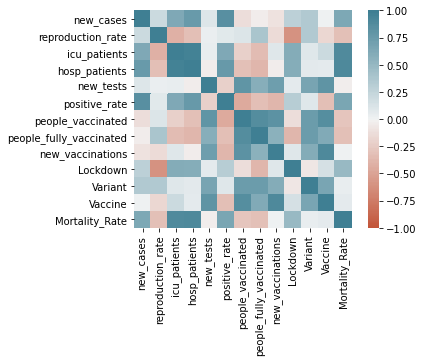

In [ ]:
#data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')

corr = dataset_UK.corr()
ax = sns.heatmap(
    corr, 
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True
)


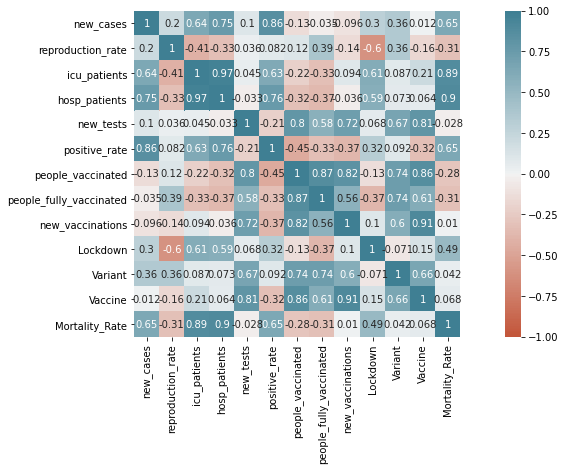

In [ ]:
corr = dataset_UK.corr()
plt.figure(figsize = (16, 6))
heatmap = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True, cmap = sns.diverging_palette(20, 220, n = 200), square = True)

In [ ]:
dataset_UK["Vaccine"].unique()

array([0, 1])

In [ ]:
dataset_UK["Variant"].unique()

array([0, 1, 2])

In [ ]:
dataset_UK["Lockdown"].unique()

array([0, 1])

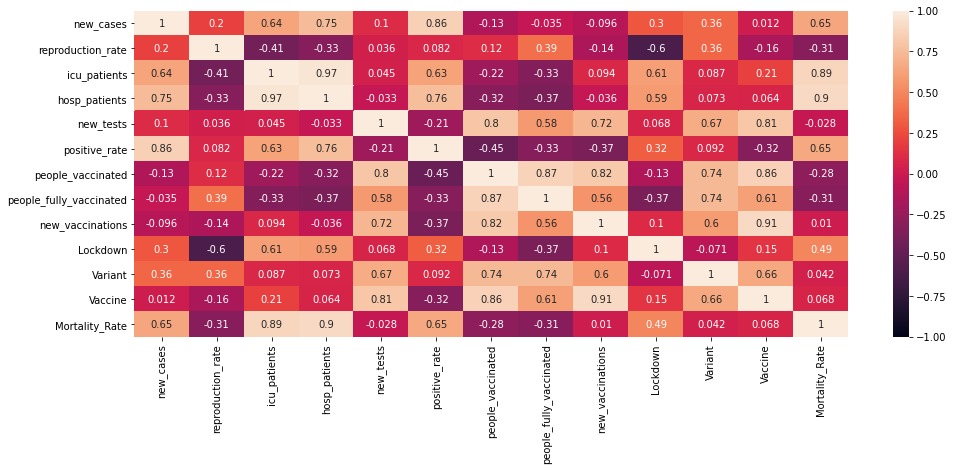

In [ ]:
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(dataset_UK.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
#heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
dataset_UK.set_index("date", inplace = True)

In [ ]:
dataset_UK

,new_cases,reproduction_rate,icu_patients,hosp_patients,new_tests,positive_rate,people_vaccinated,people_fully_vaccinated,new_vaccinations,Lockdown,Variant,Vaccine,Mortality_Rate
date,,,,,,,,,,,,,
2020-05-01,4730.0,0.94,2178.0,14723.0,74142.0,0.088,0.0,0.0,0.0,0,0,0,1.031140e-05
2020-05-02,3230.0,0.91,2068.0,14380.0,63559.0,0.079,0.0,0.0,0.0,0,0,0,8.617387e-06
2020-05-03,2977.0,0.87,2009.0,14188.0,68203.0,0.071,0.0,0.0,0.0,0,0,0,3.726836e-06
2020-05-04,3383.0,0.82,1936.0,14097.0,72630.0,0.061,0.0,0.0,0.0,0,0,0,4.021447e-06
2020-05-05,3689.0,0.81,1874.0,13723.0,66919.0,0.057,0.0,0.0,0.0,0,0,0,1.067967e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-07,32061.0,1.31,417.0,2651.0,1237992.0,0.024,45601445.0,34198779.0,258430.0,0,2,1,4.861090e-07
2021-07-08,32096.0,1.30,417.0,2736.0,1114234.0,0.025,45697875.0,34374246.0,271897.0,0,2,1,5.303008e-07
2021-07-09,35885.0,1.30,437.0,2907.0,889492.0,0.026,45787958.0,34553065.0,268902.0,0,2,1,4.419173e-07


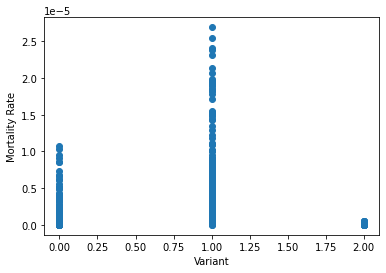

In [ ]:
plt.scatter(dataset_UK["Variant"], dataset_UK["Mortality_Rate"])


plt.xlabel("Variant") #x label
plt.ylabel("Mortality Rate") #y label
plt.show()

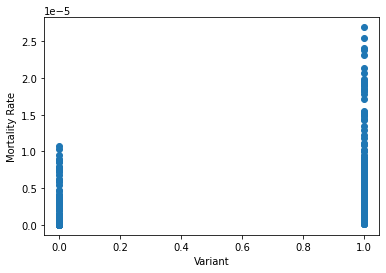

In [ ]:
plt.scatter(dataset_UK["Lockdown"], dataset_UK["Mortality_Rate"])


plt.xlabel("Variant") #x label
plt.ylabel("Mortality Rate") #y label
plt.show()

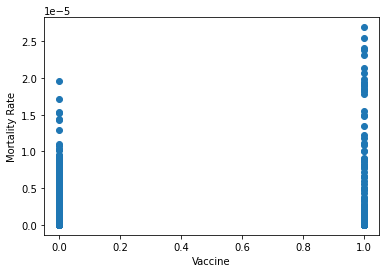

In [ ]:
plt.scatter(dataset_UK["Vaccine"], dataset_UK["Mortality_Rate"])


plt.xlabel("Vaccine") #x label
plt.ylabel("Mortality Rate") #y label
plt.show()

In [ ]:
dataset_UK.head()

,new_cases,reproduction_rate,icu_patients,hosp_patients,new_tests,positive_rate,people_vaccinated,people_fully_vaccinated,new_vaccinations,Lockdown,Variant,Vaccine,Mortality_Rate
date,,,,,,,,,,,,,
2020-05-01,4730.0,0.94,2178.0,14723.0,74142.0,0.088,0.0,0.0,0.0,0,0,0,0.000010
2020-05-02,3230.0,0.91,2068.0,14380.0,63559.0,0.079,0.0,0.0,0.0,0,0,0,0.000009
2020-05-03,2977.0,0.87,2009.0,14188.0,68203.0,0.071,0.0,0.0,0.0,0,0,0,0.000004
2020-05-04,3383.0,0.82,1936.0,14097.0,72630.0,0.061,0.0,0.0,0.0,0,0,0,0.000004
2020-05-05,3689.0,0.81,1874.0,13723.0,66919.0,0.057,0.0,0.0,0.0,0,0,0,0.000011


In [ ]:
fig = px.line(dataset_UK,  dataset_UK.index, dataset_UK["Mortality_Rate"], title = "Mortality Rate (5 countries)", color = dataset_UK["Lockdown"]) #hover_data = ["new_deaths", "population", "total_cases", "new_cases"])
fig.update_traces(mode = "markers + lines", hovertemplate = None)
fig.update_layout(hovermode = "x unified")
fig.show()

In [ ]:
fig = px.bar(dataset_UK, x = dataset_UK.index, y = "Mortality_Rate", title = "Mortality Rate")
fig.update_traces(base = "markers + lines")
fig.update_layout(hovermode = "x unified")
fig.show()

In [ ]:
fig = px.line(dataset_UK,  dataset_UK.index, dataset_UK["Mortality_Rate"], title = "Mortality Rate in Lockdown", color = dataset_UK["Lockdown"])#hover_data = ["new_deaths", "population", "total_cases", "new_cases"])
fig.update_traces(mode = "markers + lines")
fig.update_layout(hovermode = "x unified")
fig.show()

In [ ]:
fig = px.line(dataset_UK,  dataset_UK.index, dataset_UK["Mortality_Rate"], title = "Mortality with Vaccine", color = dataset_UK["Vaccine"])#hover_data = ["new_deaths", "population", "total_cases", "new_cases"])
fig.update_traces(mode = "markers + lines")
fig.update_layout(hovermode = "x unified")
fig.show()

In [ ]:
fig = px.line(dataset_UK,  dataset_UK.index, dataset_UK["new_cases"], title = "Mortality Rate with Variant", color = dataset_UK["Vaccine"])#hover_data = ["new_deaths", "population", "total_cases", "new_cases"])
fig.update_traces(mode = "markers + lines")
fig.update_layout(hovermode = "x unified")
fig.show()

In [ ]:
dataset_UK

,new_cases,reproduction_rate,icu_patients,hosp_patients,new_tests,positive_rate,people_vaccinated,people_fully_vaccinated,new_vaccinations,Lockdown,Variant,Vaccine,Mortality_Rate
date,,,,,,,,,,,,,
2020-05-01,4730.0,0.94,2178.0,14723.0,74142.0,0.088,0.0,0.0,0.0,0,0,0,1.031140e-05
2020-05-02,3230.0,0.91,2068.0,14380.0,63559.0,0.079,0.0,0.0,0.0,0,0,0,8.617387e-06
2020-05-03,2977.0,0.87,2009.0,14188.0,68203.0,0.071,0.0,0.0,0.0,0,0,0,3.726836e-06
2020-05-04,3383.0,0.82,1936.0,14097.0,72630.0,0.061,0.0,0.0,0.0,0,0,0,4.021447e-06
2020-05-05,3689.0,0.81,1874.0,13723.0,66919.0,0.057,0.0,0.0,0.0,0,0,0,1.067967e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-07,32061.0,1.31,417.0,2651.0,1237992.0,0.024,45601445.0,34198779.0,258430.0,0,2,1,4.861090e-07
2021-07-08,32096.0,1.30,417.0,2736.0,1114234.0,0.025,45697875.0,34374246.0,271897.0,0,2,1,5.303008e-07
2021-07-09,35885.0,1.30,437.0,2907.0,889492.0,0.026,45787958.0,34553065.0,268902.0,0,2,1,4.419173e-07


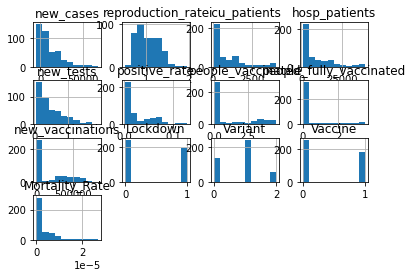

In [ ]:
dataset_UK.hist();

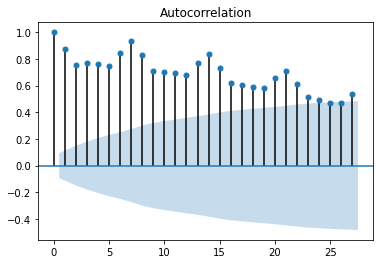

In [ ]:
plot_acf(dataset_UK["Mortality_Rate"]);

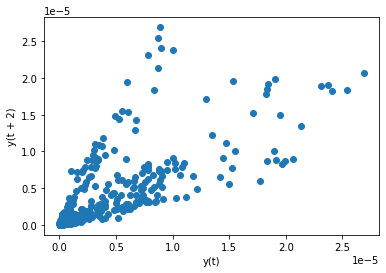

In [ ]:
lag_plot(dataset_UK["Mortality_Rate"], lag = 2);

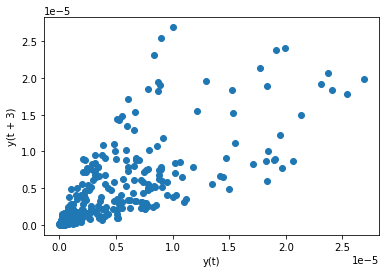

In [ ]:
lag_plot(dataset_UK["Mortality_Rate"], lag = 3);


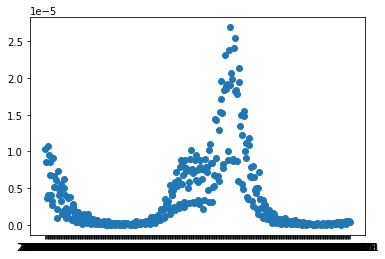

In [ ]:
plt.scatter(dataset_UK.index, dataset_UK["Mortality_Rate"])

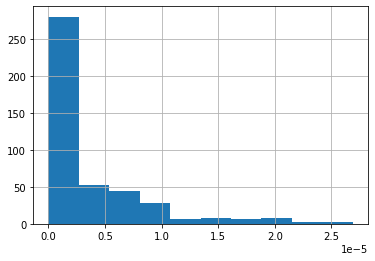

In [ ]:
dataset_UK["Mortality_Rate"].hist()

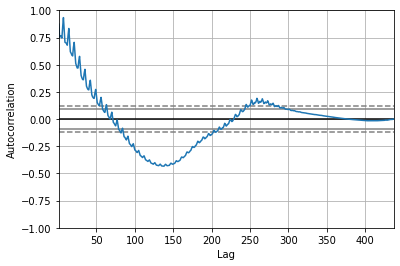

In [ ]:
autocorrelation_plot(dataset_UK["Mortality_Rate"])